# Introduction to Machine Learning

## Context

The idea behind "machine learning" is fairly simply to teach a machine to perform a task. In doing so, the hope is that the machine model can then be used to perhaps understand the task better with some human interpretation, and perhaps more importantly (or equally important) to make _accurate predictions outside our body of knowledge_. To put into more concrete terms:

> A machine learns to complete some task $Y$, through experience (training data) $X$, with the performance measured by some loss $J$

There are three parts to our problem statement: we have a goal—whether it be to predict the weather or the price of a stock—and we have data pertaining to our goal measured previously, $X$ and $Y$. Here, $Y$ corresponds to measurements of our goal (e.g. temperature, price), and $X$ are some observations we think related to our goal. We feed our machine learning model values of $X$, and its job is to then try its best to learn some mapping function that approximates the true relationship between $X$ and $Y$. This idea of a mapping function is often _parameterized_ by some flavor of machine learning model, which is often represented as $\theta$, such that the true function $f(X) = Y$, is approximated by out model $f'(X, \theta) \approx f(X)$. It's important to be able to think about $\theta$ in an abstract way representing _some model_, although to simplify things, you can think of $\theta$ as a vector representing the different parameters of our model. Starting off with some random numbers in $\theta$, our _loss function_ measures how far off our model is from the observations, for instance:

$$ J(X,Y,\theta) = | f'(X,\theta) - Y | $$

Here we are measuring the absolute difference between our model, $f'(X,\theta)$, and our observations $Y$. The task of machine learning is to minimize $J$, such that our model _best approximates the observations_.

What defines a machine learning model? In our abstract terms, we're stating that it's some unknown function $f'(X,\theta)$ which is parameterized by $\theta$. In practice, the model can be defined in two ways: first, we know or have an idea of how $X$ should actually map onto $Y$, and we can come up with a function that implements these ideas (like a physics-based approach); second, we have no idea what the actual relationship between $X$ and $Y$ are, and we make no assumptions about how these values map onto each other. The former is a parametric approach, while the latter is a non-parametric approach. There are certain advantages to either methods, and in general, it is up to us humans to find the best type of approach to solve our machine learning task.

## Parametric models

### Linear regression

The simplest parametric model you can think of is a direct, linear mapping between $X$ and $Y$. From high school level maths, we have been seeing this expression:

$$ y = mx + b$$

where $m$ and $b$ are the slope and intercept terms respectively. In machine learning, particularly for deep learning/neural networks, we often rewrite this in terms of vectors:

$$ Y = w^T X + b$$

where $w$ is a vector of "weights", and $b$ is a bias/offset term. Functionally speaking they are identical to what we've seen in high school, but this way of writing it actually allows us to _implement it with linear algebra computing!_

To solve this in Python, we will take advantage of the NumPy (numerical Python) package, which is the basis for virtually all computation using Python.

__I will use capital case to denote _arrays_, while lower case letters are _vectors_. For example, if there are multiple types of features (e.g. temperature, air pressure, wind speed), these are represented as $X$, as opposed to a single column of data like just temperature which would be $x$__. The equation above can be applied to vector or multi-dimensional arrays.

In [1]:
import numpy as np

In [2]:
# random number generation comes from a "seed" number, letting us reproduce 
# random sampling
_ = np.random.seed(42)

We will generate some fake data and observations

In [31]:
# Generate some x values
x = np.linspace(-5., 5., 200)

def generate_linear_data(x: np.ndarray, slope=3., intercept=0.5, noise_sigma=0.5):
    # calculate our equation
    y = x * slope + intercept
    # add some noise!
    y += np.random.normal(scale=noise_sigma, size=x.size)
    return y

In [4]:
y = generate_linear_data(x)

Let's plot this up with matplotlib

In [5]:
from matplotlib import pyplot as plt

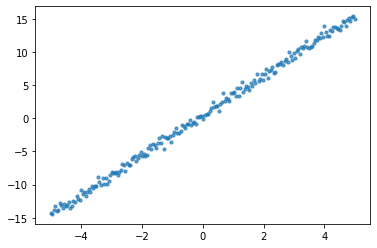

In [6]:
plt.scatter(x, y, alpha=0.7, s=10)

In [7]:
# rewrite our function to support multidimensional X; we can have
# as many features now as we want!
def linear_model(X, w, b):
    return w.T @ X + b

In [37]:
# We generate our model based on the number of dimensions
# of our data
ndimension = x.ndim

w = np.random.rand(ndimension)
# the bias term is independent of dimension; we apply
# the one bias value regardless
b = np.random.rand()

Here we're going to generalize our model to support $N$ dimensions: $x$ until now has been a vector, but we can represent it as a single row array instead:

In [38]:
# Reshape x to create a new dimension: instead of a single vector, we are looking at
# a matrix with a single row
X = x.reshape(1,-1)

In [44]:
y_model = linear_model(X, w, b)

Now that we've computed our model, we need to look at how it stands against our actual data:

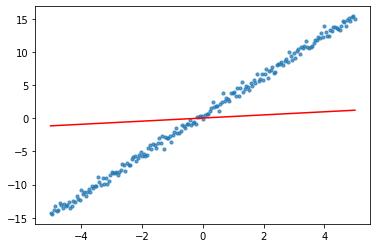

In [45]:
plt.scatter(x, y, alpha=0.7, s=10, label="Data")
# use the first row of matrix X to plot up the data, otherwise
# it will fail!
plt.plot(X[0], y_model, label="Model", color="red")

So now our goal is to find values of $w$ and $b$ that faithfully reproduces this data; we are optimizing our model.

In [12]:
def mean_squared_loss(X: np.ndarray, y_true: np.ndarray, model_func: object, *parameters):
    """
    Compute the mean-squared error between a supplied model function, `model_func`
    using `parameters` and data `X`, and the observed values `y_true`.
    
    The `*parameters` pattern simply unpacks every value after `model_func` and
    passes it into the computation of `model_func`.
    """
    y_pred = model_func(X, *parameters)
    J = np.mean(np.square(y_true - y_pred))
    return J

In [13]:
mean_squared_loss(X, y, linear_model, w, b)

38.614733860124964

There are many ways to minimize this loss, and you could do an entire course on optimization. For now, I'm going to implement the simplest way of doing this: modifying our parameters by random values, and only updating when our loss is decreased. This is actually called the Metropolis-Hastings algorithm, where we will keep generating random numbers, and some of them will stick!

Smarter way:

$$ \frac{dJ}{dw} = 0, J = 0,$$

In [47]:
nsteps = 10000

w = np.random.randn(1, 1) * 5.
b = np.random.randn(1, 1) * 5.

losses = list()

# Loop over the number of steps
for step in range(1, nsteps + 1):
    # first step we just save the loss as is
    if step == 1:
        last_loss = mean_squared_loss(X, y, linear_model, w, b)
        best_w = w
        best_b = b
        print(f"Starting loss: {last_loss}, w: {best_w}, b: {best_b}")
    else:
        # generate random values of parameters
        w = np.random.randn(1, 1) * 5.
        b = np.random.randn(1, 1) * 5.
        # compute the loss with these values
        new_loss = mean_squared_loss(X, y, linear_model, w, b)
        # if our new parameters give us a better match to the data,
        # then we save these values
        if new_loss < last_loss:
            best_w = w
            best_b = b
            last_loss = new_loss
        # every now and then, we will accept worse values just to
        # mix things up a little bit
        else:
            ratio = new_loss / last_loss
            if ratio < np.random.rand():
                best_w = w
                best_b = b
                last_loss = new_loss
    if step % int(nsteps * 0.2) == 0:
        print(f"Number of steps: {step}, current loss: {last_loss}, w: {best_w}, b: {best_b}")
    losses.append(last_loss)

Starting loss: 323.31873757182797, w: [[-3.18404504]], b: [[0.3163533]]
Number of steps: 2000, current loss: 0.34350038577541225, w: [[2.8974761]], b: [[0.62012269]]
Number of steps: 4000, current loss: 0.34350038577541225, w: [[2.8974761]], b: [[0.62012269]]
Number of steps: 6000, current loss: 0.275304966003154, w: [[2.99639461]], b: [[0.23693158]]
Number of steps: 8000, current loss: 0.2181413344768724, w: [[2.99109971]], b: [[0.49217855]]
Number of steps: 10000, current loss: 0.2181413344768724, w: [[2.99109971]], b: [[0.49217855]]


[None, Text(0, 0.5, 'MSE'), Text(0.5, 0, 'Steps')]

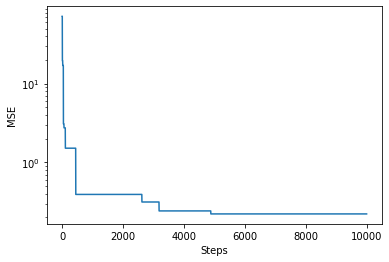

In [15]:
fig, ax = plt.subplots()

ax.plot(losses)

ax.set(yscale="log", xlabel="Steps", ylabel="MSE")

## An easier way

Now to do this, we actually had to write a fair amount of code. Turns out we don't actually have to, because the open-source community has provided a lot of this work to us and absolutely for free. The `scikit` community is a collection of open-source projects in Python, where people have implemented a variety of functions and code that are tailored for specific scientific research disciplines. `sckit-learn` is one of the most popular, which implements a lot of machine learning techniques, and others like `scikit-image` are image analysis routines, and `scikit-hep` is high energy physics.

In [16]:
!pip install scikit-learn==0.23.1

In [17]:
from sklearn.linear_model import LinearRegression

The advantage of having a collection of these models is that they are all syntatically the same: if you learn how to use one model, in theory you can use any of them!

There are three steps to using a `sklearn` model:

1. We start by creating a model from one of the classes in `sklearn`,

In [18]:
# we can pass arguments into this "constructor" to specify options
# for our model
model = LinearRegression(fit_intercept=True, normalize=False)

We have to reshape our data, because `sklearn` expects each observation to be along rows, and each feature to be columns. The $Y$ array we've been treating as a vector until now also has to be a matrix:

In [19]:
X_sk = X.reshape(-1, 1)
Y = y.reshape(-1, 1)

2. We fit our data,

In [50]:
# fit the data using our model
result = model.fit(X_sk, Y)

In [52]:
print(f"w: {result.coef_}, b: {result.intercept_}")

w: [[3.01140038]], b: [0.47961452]


3. We make predictions, or validate our data,

In [22]:
y_pred = result.predict(X_sk)

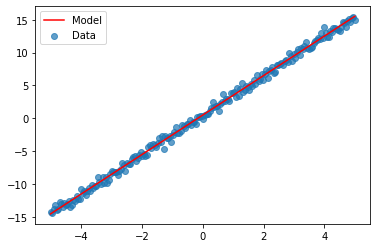

In [23]:
fig, ax = plt.subplots()

ax.scatter(X_sk[:,0], Y[:,0], label="Data", alpha=0.7)
ax.plot(X_sk[:,0], y_pred[:,0], label="Model", color="red")

ax.legend()

## Non-parametric models

In the linear regression case above, we had to define $n+1$ parameters (for $n$ features) in order to describe the relationship between $X$ and $Y$. The advantage of parametrization is that we can explicitly define and control what the relationship is, as well as introduce some intuition in the development of the model, which can lead to quick convergence and reliability of the model. For example, in any given physics model we can break it down to assumptions that we make and understand, and consequently know where it will fail to work well.

A non-parametric model makes no assumptions of the relationship between $X$ and $Y$: this is advantageous when we don't want to include some kind of human bias to understanding our data, or simply we have no idea where to start with. An example would be the relationship between the viscosity of honey and the cosmic ray ionization rate: in principle there probably is a very complex relationship between these two phenomena, but you would have to jump through a lot of hoops to derive a physical relationship/model. In these cases, a good effort would be to use a non-parametric model.

The simplest of this family is called [$k$-nearest neighbors](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression): the description of every value of $X,Y$ is simply governed by datapoints that are close to it, in a way that could be thought of as taking the average within a local neighborhood. We take $k$ of the closest datapoints of $X$ in order to predict $Y$.

In [24]:
from sklearn.neighbors import KNeighborsRegressor

In [53]:
# specify number of neighbors to use
knn_model = KNeighborsRegressor(n_neighbors=10)

In [54]:
knn_result = knn_model.fit(X_sk, Y)

In [55]:
# We can query our "model" for the closest neighbors in X space
distances, indices = knn_result.kneighbors(X_sk[10:11])

In [56]:
# otherwise, just make a prediction
knn_pred = knn_result.predict(X_sk)

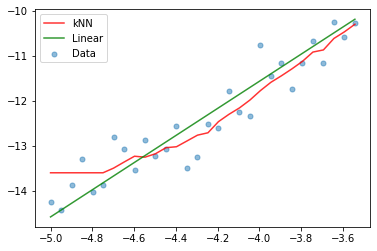

In [66]:
fig, ax = plt.subplots()

# Plot the first 30 points to zoom in and show the differences between
# kNN and linear regression
ax.scatter(X_sk[:30,0], Y[:30,0], label="Data", alpha=0.5, s=25)
ax.plot(X_sk[:30,0], knn_pred[:30,0], label="kNN", color="red", alpha=0.8)
ax.plot(X_sk[:30,0], y_pred[:30,0], label="Linear", color="green", alpha=0.8)

ax.legend()

## Where to from here?

Linear regression serves as one of the simplest models we can build to try and understand any kind of process: we have $n+1$ parameters (where $n$ is the number of features) to represent our model, and the idea of a more or less direct mapping between inputs and outputs helps a lot with _interpretability_; how we can use the derived parameters to understand the relationship between model and data.

From here on, we can build more complicated models which are capable of modeling even more complex relationships, particularly _non-linear dependencies_ between data. However, as we get to more powerful models, we gradually lose this ability to understand what the parameters are doing, i.e. the model becomes less interpretable.

Another aspect that we haven't touched is to differentiate between _unsupervised and supervised learning_: algorithms that either need or do not need what to look for as parameters are learned. A linear regression model is a basic form of the latter; we explicitly define _how_ $X$ and $Y$ are related (i.e. through a linear relationship). [Here is a list of supervised methods available to `sklearn`](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). The former comprises machine learning methods that do not need to be explicitly told what features are important, and how to map $X$ to $Y$. The advantage of this approach is that you don't need necessarily perform feature extraction (the computer learns what information is important to predict) and potentially learns relationships in the data that humans would not have otherwise thought of, although this can be a blessing and a curse. Perhaps the most well-known method within this class are neural network approaches, which are the building blocks of deep learning. Because this field is much more vast, [`sklearn` only has a handful of these models implemented](https://scikit-learn.org/stable/unsupervised_learning.html) compared to the supervised methods; in the case of neural networks, we tend to use more specialized libraries like Tensorflow and PyTorch.